In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download tawsifurrahman/covid19-radiography-database

 98% 729M/745M [00:21<00:00, 33.7MB/s]
100% 745M/745M [00:21<00:00, 36.8MB/s]


In [ ]:
! unzip /content/covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout


from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

import tensorflow as tf

import cv2
import os

import numpy as np


In [ ]:
os.mkdir("/content/Valid")
os.mkdir("/content/Test")

In [ ]:
import shutil
import os
import numpy as np
import argparse

def get_files_from_folder(path):

    files = os.listdir(path)
    return np.asarray(files)

def main(path_to_data, path_to_test_data, train_ratio):
    # get dirs
    _, dirs, _ = next(os.walk(path_to_data))

    # calculates how many train data per class
    data_counter_per_class = np.zeros((len(dirs)))
    for i in range(len(dirs)):
        path = os.path.join(path_to_data, dirs[i])
        files = get_files_from_folder(path)
        data_counter_per_class[i] = len(files)
    test_counter = np.round(data_counter_per_class * (1 - train_ratio))

    # transfers files
    for i in range(len(dirs)):
        path_to_original = os.path.join(path_to_data, dirs[i])
        path_to_save = os.path.join(path_to_test_data, dirs[i])

        #creates dir
        if not os.path.exists(path_to_save):
            os.makedirs(path_to_save)
        files = get_files_from_folder(path_to_original)
        # moves data
        for j in range(int(test_counter[i])):
            dst = os.path.join(path_to_save, files[j])
            src = os.path.join(path_to_original, files[j])
            shutil.move(src, dst)




if __name__ == "__main__":
  
  main("/content/COVID-19_Radiography_Dataset","/content/Valid", 0.75)

In [ ]:
DATADIRTRAIN="/content/COVID-19_Radiography_Dataset"
DATAVALID="/content/Valid"



In [ ]:
trainer=ImageDataGenerator(rescale=1/255,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid=ImageDataGenerator(rescale=1/255)

In [ ]:
train= trainer.flow_from_directory(
       DATADIRTRAIN ,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',classes=['COVID','Lung_Opacity','Normal','Viral Pneumonia'])

valid = valid.flow_from_directory(
        DATAVALID,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',classes=['COVID','Lung_Opacity','Normal','Viral Pneumonia'])

Found 15874 images belonging to 4 classes.
Found 5291 images belonging to 4 classes.


In [ ]:
train.class_indices

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

In [ ]:
valid.class_indices

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

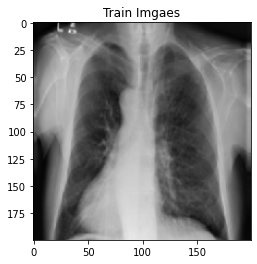

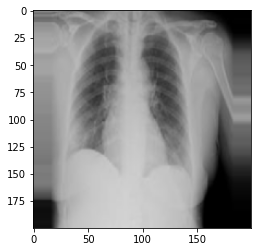

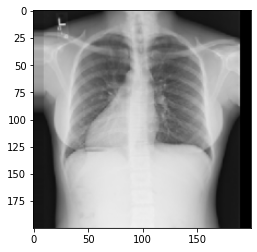

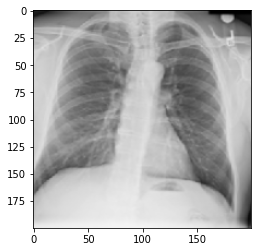

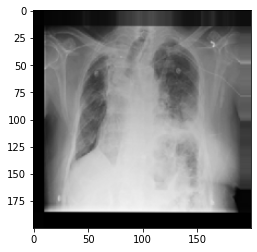

In [ ]:
plt.title("Train Imgaes")
for i in range(5):
  x,y=train.__getitem__(i)
  #plt.gray()
  #
  plt.imshow(x[0])
  plt.show()


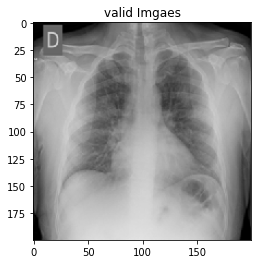

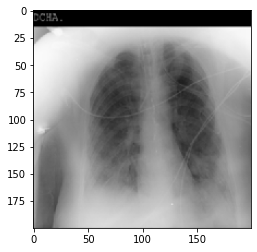

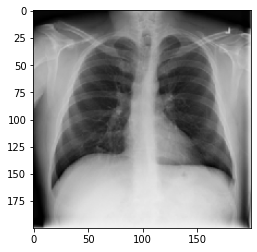

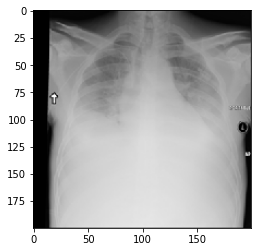

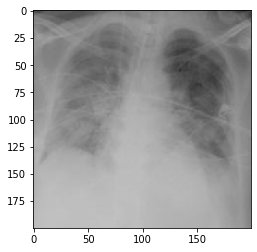

In [ ]:
plt.title("valid Imgaes")
for i in range(5):
  x,y=valid.__getitem__(i)
  #plt.gray()
  #
  plt.imshow(x[0])
  plt.show()


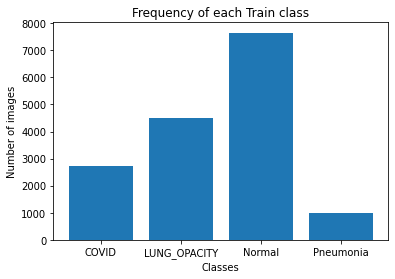

In [ ]:
from collections import Counter
counter = Counter(train.classes)   
x=['COVID', 'LUNG_OPACITY', 'Normal', 'Pneumonia']
y=[]                       
for i in counter:
    y.append(counter[i])
plt.title("Frequency of each Train class")
plt.xlabel("Classes")
plt.ylabel("Number of images")

plt.bar(x,y)
plt.show()

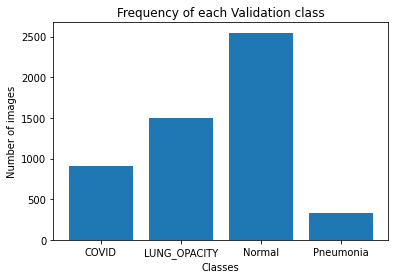

In [ ]:
from collections import Counter
counter = Counter(valid.classes)   
x=['COVID', 'LUNG_OPACITY', 'Normal', 'Pneumonia']
y=[]                       
for i in counter:
    y.append(counter[i])
plt.title("Frequency of each Validation class")
plt.xlabel("Classes")
plt.ylabel("Number of images")

plt.bar(x,y)
plt.show()
   

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(16, activation='relu'))

model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 activation (Activation)     (None, 196, 196, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 96, 96, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                    

In [ ]:
from keras import optimizers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy',patience=10)

In [ ]:
model.fit(train,epochs=50,batch_size=32, validation_data = valid,callbacks=[early_stop])

Epoch 1/50
497/497 [==============================] - 206s 393ms/step - loss: 0.9328 - accuracy: 0.6048 - val_loss: 0.7960 - val_accuracy: 0.6861
Epoch 2/50
497/497 [==============================] - 189s 380ms/step - loss: 0.7855 - accuracy: 0.6782 - val_loss: 0.6985 - val_accuracy: 0.7031
Epoch 3/50
497/497 [==============================] - 188s 378ms/step - loss: 0.7051 - accuracy: 0.7184 - val_loss: 0.6373 - val_accuracy: 0.7428
Epoch 4/50
497/497 [==============================] - 190s 382ms/step - loss: 0.6427 - accuracy: 0.7459 - val_loss: 0.6066 - val_accuracy: 0.7541
Epoch 5/50
497/497 [==============================] - 192s 386ms/step - loss: 0.6065 - accuracy: 0.7630 - val_loss: 0.5835 - val_accuracy: 0.7679
Epoch 6/50
497/497 [==============================] - 192s 387ms/step - loss: 0.5545 - accuracy: 0.7839 - val_loss: 0.6615 - val_accuracy: 0.7413
Epoch 7/50
497/497 [==============================] - 191s 385ms/step - loss: 0.5307 - accuracy: 0.7962 - val_loss: 0.5341 -

In [ ]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.932771,0.604762,0.795956,0.686071
1,0.785474,0.678153,0.698548,0.703081
2,0.705147,0.718407,0.637281,0.742771
3,0.642693,0.745874,0.606628,0.754111
4,0.606546,0.763009,0.583520,0.767908
5,0.554470,0.783923,0.661521,0.741259
6,0.530725,0.796208,0.534056,0.798715
7,0.521543,0.799483,0.477329,0.814402
8,0.501520,0.811264,0.492726,0.809488
9,0.476401,0.824115,0.465391,0.819883


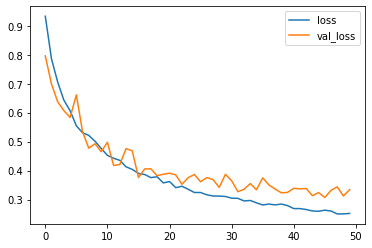

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

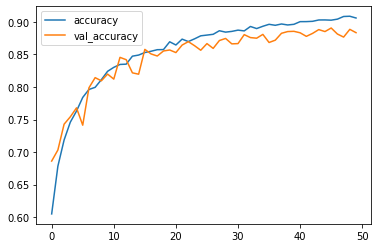

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
#model.save('/content/gdrive/MyDrive/Paras/Finalmodel.h5')

In [ ]:
model.fit(train,epochs=50,batch_size=32, validation_data = valid,callbacks=[early_stop])

Epoch 1/50
497/497 [==============================] - 190s 382ms/step - loss: 0.2458 - accuracy: 0.9098 - val_loss: 0.3924 - val_accuracy: 0.8686
Epoch 2/50
497/497 [==============================] - 190s 382ms/step - loss: 0.2540 - accuracy: 0.9072 - val_loss: 0.3188 - val_accuracy: 0.8862
Epoch 3/50
497/497 [==============================] - 190s 383ms/step - loss: 0.2495 - accuracy: 0.9082 - val_loss: 0.3280 - val_accuracy: 0.8898
Epoch 4/50
497/497 [==============================] - 190s 381ms/step - loss: 0.2409 - accuracy: 0.9126 - val_loss: 0.3454 - val_accuracy: 0.8870
Epoch 5/50
497/497 [==============================] - 189s 379ms/step - loss: 0.2454 - accuracy: 0.9089 - val_loss: 0.3279 - val_accuracy: 0.8841
Epoch 6/50
497/497 [==============================] - 195s 393ms/step - loss: 0.2439 - accuracy: 0.9069 - val_loss: 0.3284 - val_accuracy: 0.8851
Epoch 7/50
497/497 [==============================] - 193s 388ms/step - loss: 0.2466 - accuracy: 0.9068 - val_loss: 0.3444 -

KeyboardInterrupt: ignored

In [ ]:
#model.save('/content/gdrive/MyDrive/Paras/Finalmodel2.h5')

In [ ]:
#model = keras.models.load_model('/content/gdrive/MyDrive/Paras/Finalmodel2.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
folder="/content/Valid/COVID"
arr=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
y_actual=[]
y_predicted=[]
for filename in os.listdir(folder):
  img = image.load_img(os.path.join(folder,filename), target_size=(200, 200))
  

  img_array = image.img_to_array(img)

  img_batch = np.expand_dims(img_array, axis=0)

  img_batch=img_batch/255.0
  prediction=model.predict(img_batch)
  index=0
  maxi=-9999
  #print(prediction)
  for i in range(len(prediction[0])):
    if prediction[0][i]>maxi:
      maxi=prediction[0][i]
      index=i
  y_actual.append("COVID")
  y_predicted.append(arr[index])
  #print("predicted:"+arr[index])
  #print("Actual:"+filename)


folder="/content/Valid/Lung_Opacity"
for filename in os.listdir(folder):
  img = image.load_img(os.path.join(folder,filename), target_size=(200, 200))
  

  img_array = image.img_to_array(img)

  img_batch = np.expand_dims(img_array, axis=0)

  img_batch=img_batch/255.0
  prediction=model.predict(img_batch)
  index=0
  maxi=-9999
  #print(prediction)
  for i in range(len(prediction[0])):
    if prediction[0][i]>maxi:
      maxi=prediction[0][i]
      index=i
  y_actual.append("Lung_Opacity")
  y_predicted.append(arr[index])



folder="/content/Valid/Normal"
for filename in os.listdir(folder):
  img = image.load_img(os.path.join(folder,filename), target_size=(200, 200))
  

  img_array = image.img_to_array(img)

  img_batch = np.expand_dims(img_array, axis=0)

  img_batch=img_batch/255.0
  prediction=model.predict(img_batch)
  index=0
  maxi=-9999
  #print(prediction)
  for i in range(len(prediction[0])):
    if prediction[0][i]>maxi:
      maxi=prediction[0][i]
      index=i
  y_actual.append("Normal")
  y_predicted.append(arr[index])

folder="/content/Valid/Viral Pneumonia"
for filename in os.listdir(folder):
  img = image.load_img(os.path.join(folder,filename), target_size=(200, 200))
  

  img_array = image.img_to_array(img)

  img_batch = np.expand_dims(img_array, axis=0)

  img_batch=img_batch/255.0
  prediction=model.predict(img_batch)
  index=0
  maxi=-9999
  #print(prediction)
  for i in range(len(prediction[0])):
    if prediction[0][i]>maxi:
      maxi=prediction[0][i]
      index=i
  y_actual.append("Viral Pneumonia")
  y_predicted.append(arr[index])



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_actual,y_predicted))


                 precision    recall  f1-score   support

          COVID       0.97      0.93      0.95       904
   Lung_Opacity       0.89      0.91      0.90      1503
         Normal       0.93      0.94      0.93      2548
Viral Pneumonia       0.97      0.91      0.94       336

       accuracy                           0.93      5291
      macro avg       0.94      0.92      0.93      5291
   weighted avg       0.93      0.93      0.93      5291



[[ 839   33   28    4]
 [  15 1361  126    1]
 [  11  138 2395    4]
 [   3    1   26  306]]


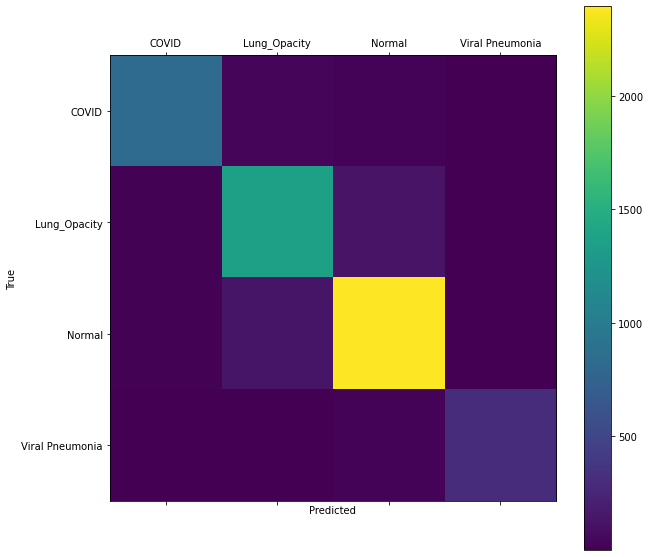

In [ ]:
import pandas as pd
y_pred = model.predict(valid)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))
#Retrieve the True classes of the test set
y_true=valid.classes
classes=["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

#Build Confusion Matrix
CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

keras.backend.clear_session()

In [ ]:
from tensorflow.keras.preprocessing import image
import pandas as pd
folder="/content/Test"
arr=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
file_name=[]
y_predicted=[]
for filename in os.listdir(folder):
  img = image.load_img(os.path.join(folder,filename), target_size=(200, 200))
  

  img_array = image.img_to_array(img)

  img_batch = np.expand_dims(img_array, axis=0)

  img_batch=img_batch/255.0
  prediction=model.predict(img_batch)
  index=0
  maxi=-9999
  #print(prediction)
  for i in range(len(prediction[0])):
    if prediction[0][i]>maxi:
      maxi=prediction[0][i]
      index=i
  file_name.append(filename)
  y_predicted.append(arr[index])
mp={
    'File name':file_name,
    'Prediction':y_predicted
}
df=pd.DataFrame(mp)
print(df)


                   File name       Prediction
0           Normal-10059.png           Normal
1                COVID-1.png            COVID
2           Normal-10096.png           Normal
3             COVID-1037.png            COVID
4    Viral Pneumonia-110.png  Viral Pneumonia
5   Viral Pneumonia-1022.png  Viral Pneumonia
6      Lung_Opacity-1032.png     Lung_Opacity
7   Viral Pneumonia-1081.png  Viral Pneumonia
8           Normal-10008.png           Normal
9      Lung_Opacity-1081.png     Lung_Opacity
10        Lung_Opacity-1.png     Lung_Opacity
11            COVID-1007.png            COVID
